In [92]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# Задача о прожвижении сотрудника по службе

## Основная информация
В этом наборе данных представлены сведения о работниках некоторой компании. Для каждого сотрудника указано:

* id - его идентификатор
* department - отдел
* region - регион
* education - ступень образования
* gender - пол
* recruitment_channel - канал найма
* no_of_trainings - количество пройденных тренингов
* age - возраст
* previous_year rating - рейтинг сотрудника за прошлый год
* length_of_service - стаж работы
* KPIs_met > 80 % - ключевые показатели эффективности выше 80 % ?
* awards_won ? - выигрывал ли награды?
* avg_training_score - средний балл на тренингах
* is_promoted - был ли повышен в должности?


Некоторое колличество человек каждый год получают продвижение по службе (примерно 5%). 
Задача заключается в определении достоин ли сотрудник получить повышение или нет на основе доступных данных. 

## Загружаем данные

In [93]:
url = "https://raw.githubusercontent.com/NikolaySokolov152/MachineLearning/master/dataset/train.csv"

data_raw = pd.read_csv(url)

## Обработка пропущенных значений (или убедиться, что их нет)

In [94]:
data_raw.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [95]:
data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)
data_raw['education'].fillna(data_raw['education'].mode().iloc[0], inplace=True)
data_raw.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [96]:
data_raw.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


## Обработка категориальных признаков

In [97]:
data_raw.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [98]:
data_raw.describe(include=['object'])

,department,region,education,gender,recruitment_channel
count,54808,54808,54808,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,39078,38496,30446


In [99]:
data_raw['department'] = data_raw['department'].astype('category')
data_raw['region'] = data_raw['region'].astype('category')
data_raw['education'] = data_raw['education'].astype('category')
data_raw['gender'] = data_raw['gender'].astype('category')
data_raw['recruitment_channel'] = data_raw['recruitment_channel'].astype('category')

In [100]:
data_raw['gender'] = data_raw['gender'].cat.codes
Department_dummies = pd.get_dummies(data_raw['department'], prefix = 'department')
Education_dummies = pd.get_dummies(data_raw['education'], prefix = 'education')
Recruitment_channel_dummies = pd.get_dummies(data_raw['recruitment_channel'], prefix = 'recruitment_channel')
Region_dummies = pd.get_dummies(data_raw['region'])

In [101]:
data_raw = pd.concat((data_raw, Department_dummies), axis=1)
data_raw = data_raw.drop(['department'], axis=1)

data_raw = pd.concat((data_raw, Education_dummies), axis=1)
data_raw = data_raw.drop(['education'], axis=1)

data_raw = pd.concat((data_raw, Recruitment_channel_dummies), axis=1)
data_raw = data_raw.drop(['recruitment_channel'], axis=1)

data_raw = pd.concat((data_raw, Region_dummies), axis=1)
data_raw = data_raw.drop(['region'], axis=1)

In [102]:
data_raw.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,65438,0,1,35,5.0,8,1,0,49,0,...,0,0,0,0,0,0,0,1,0,0
1,65141,1,1,30,5.0,4,0,0,60,0,...,0,0,0,0,0,0,0,0,0,0
2,7513,1,1,34,3.0,7,0,0,50,0,...,0,0,0,0,0,0,0,0,0,0
3,2542,1,2,39,1.0,10,0,0,50,0,...,0,0,0,0,0,0,0,0,0,0
4,48945,1,1,45,3.0,2,0,0,73,0,...,0,0,0,0,0,0,0,0,0,0


## Нормализация

In [103]:
data_stand = (data_raw - data_raw.min(axis = 0))/(data_raw.max(axis = 0)-data_raw.min(axis = 0))
data_stand.describe()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,...,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,0.500592,0.702379,0.028112,0.370098,0.576120,0.135153,0.351974,0.023172,0.406446,0.085170,...,0.035305,0.017242,0.004908,0.005328,0.031072,0.013976,0.012589,0.088363,0.011951,0.007663
std,0.288473,0.457216,0.067696,0.191504,0.303692,0.118475,0.477590,0.150450,0.222859,0.279137,...,0.184551,0.130173,0.069886,0.072797,0.173514,0.117392,0.111495,0.283825,0.108666,0.087204
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251207,0.000000,0.000000,0.225000,0.500000,0.055556,0.000000,0.000000,0.200000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500971,1.000000,0.000000,0.325000,0.500000,0.111111,0.000000,0.000000,0.350000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750086,1.000000,0.000000,0.475000,0.750000,0.166667,1.000000,0.000000,0.616667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
data_stand.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,0.835754,0.0,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.831960,1.0,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.095942,1.0,0.000000,0.350,0.5,0.166667,0.0,0.0,0.183333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.032453,1.0,0.111111,0.475,0.0,0.250000,0.0,0.0,0.183333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.625107,1.0,0.000000,0.625,0.5,0.027778,0.0,0.0,0.566667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Подготовка тестовой и тренировочной выборок

In [105]:
data_stand.columns

Index(['employee_id', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'education_Bachelor's',
       'education_Below Secondary', 'education_Master's & above',
       'recruitment_channel_other', 'recruitment_channel_referred',
       'recruitment_channel_sourcing', 'region_1', 'region_10', 'region_11',
       'region_12', 'region_13', 'region_14', 'region_15', 'region_16',
       'region_17', 'region_18', 'region_19', 'region_2', 'region_20',
       'region_21', 'region_22', 'region_23', 'region_24', 'region_25',
       'region_26', 'region_27', 'region_28', 'region_29', 'region_3',
       'region_30', 'region_31', 'region_32', 'region_33

In [106]:
data_stand.isna().sum()

employee_id                     0
gender                          0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
is_promoted                     0
department_Analytics            0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
education_Bachelor's            0
education_Below Secondary       0
education_Master's & above      0
recruitment_channel_other       0
recruitment_channel_referred    0
recruitment_channel_sourcing    0
region_1                        0
region_10                       0
region_11                       0
region_12                       0
region_13     

In [107]:
data_stand.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,0.835754,0.0,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.831960,1.0,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.095942,1.0,0.000000,0.350,0.5,0.166667,0.0,0.0,0.183333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.032453,1.0,0.111111,0.475,0.0,0.250000,0.0,0.0,0.183333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.625107,1.0,0.000000,0.625,0.5,0.027778,0.0,0.0,0.566667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Уберу неинформативный признак id

In [108]:
emp_id = data_stand['employee_id']
data_stand = data_stand.drop(['employee_id'], axis = 1)

In [109]:
data_stand.columns

Index(['gender', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'education_Bachelor's', 'education_Below Secondary',
       'education_Master's & above', 'recruitment_channel_other',
       'recruitment_channel_referred', 'recruitment_channel_sourcing',
       'region_1', 'region_10', 'region_11', 'region_12', 'region_13',
       'region_14', 'region_15', 'region_16', 'region_17', 'region_18',
       'region_19', 'region_2', 'region_20', 'region_21', 'region_22',
       'region_23', 'region_24', 'region_25', 'region_26', 'region_27',
       'region_28', 'region_29', 'region_3', 'region_30', 'region_31',
       'region_32', 'region_33', 'region_34',

Разделение выборки на Х и У

In [110]:
Y = data_stand[['is_promoted']]
X = data_stand.drop(['is_promoted'], axis=1)
print("x:", X.shape)
print("y:", Y.shape)

x: (54808, 57)
y: (54808, 1)


### Разделение выборки на тренировочную и тестовую

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 21)
print("x_train: ", x_train.shape)
print("x_test ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (43846, 57)
x_test  (10962, 57)
y_train:  (43846, 1)
y_test:  (10962, 1)


# Запуск нейросети c 100 нейронами 

In [113]:
from sklearn.neural_network import MLPClassifier

In [114]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100, ),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          max_iter = 1000,
                          random_state = 42)

In [78]:
%%time
mlp_model.fit(x_train,  y_train.values.ravel())

Wall time: 2min 14s


E:\Anaonda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', max_iter=1000, random_state=42,
              solver='lbfgs')

In [84]:
y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)

In [85]:
print(mlp_model.score(x_train, y_train), mlp_model.score(x_test, y_test))

0.9155681248004379 0.9118773946360154


In [86]:
print(1 - mlp_model.score(x_test, y_test))

0.08812260536398464


In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.9155681248004379

In [88]:
accuracy_score(y_test, y_test_pred)

0.9118773946360154

### Подбор гипер параметров

In [71]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100, ), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000,random_state = 42)
    mlp_model.fit(x_train, y_train.values.ravel())

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    
    train_err.append(1 - mlp_model.score(x_train, y_train))
    test_err.append(1 - mlp_model.score(x_test, y_test))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

E:\Anaonda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\Anaonda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\Anaonda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

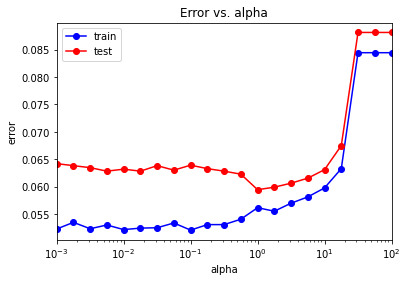

In [72]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

Рассмотрим как у нас менялась метрика в зависимости от гиперпараметра:

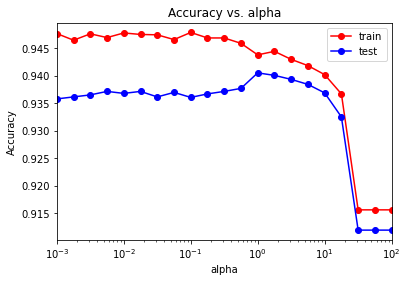

In [73]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Минимальное значение ошибки:

In [74]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.05211421794462434 0.05947819740923188


Оптимальное значение alpha:

In [75]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[1.]


#### Классификатор при найденном оптимальном значении alpha:

In [76]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(x_train, y_train)

y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)

print(1 - mlp_model.score(x_train, y_train))
print(1 - mlp_model.score(x_test, y_test))

E:\Anaonda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.05619668840943304
0.05947819740923188


In [77]:
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.943803311590567
0.9405218025907681


#### Матрица рассогласования:

In [78]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[9983  639]
 [  13  327]]


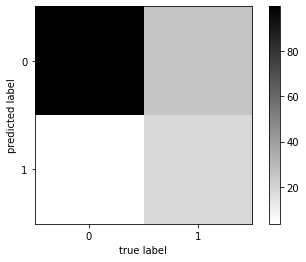

In [79]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

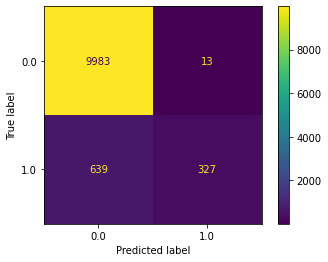

In [80]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp_model, x_test, y_test) 

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      9996
         1.0       0.96      0.34      0.50       966

    accuracy                           0.94     10962
   macro avg       0.95      0.67      0.73     10962
weighted avg       0.94      0.94      0.93     10962



# Подбор гипер параметров с 2 слоями

In [79]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100, 100), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(x_train, y_train.values.ravel())

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    
    train_err.append(1 - mlp_model.score(x_train, y_train))
    test_err.append(1 - mlp_model.score(x_test, y_test))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

E:\Anaonda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\Anaonda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\Anaonda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

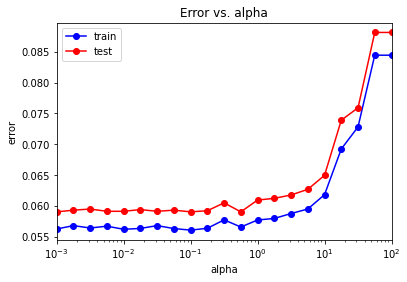

In [80]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

Рассмотрим как у нас менялась метрика в зависимости от гиперпараметра:

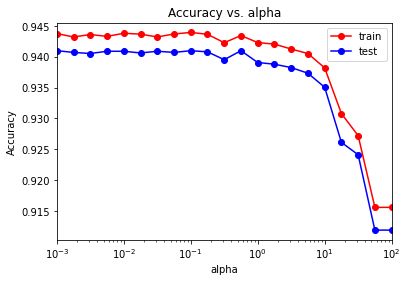

In [81]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Минимальное значение ошибки:

In [82]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.05605984582402046 0.05902207626345557


Оптимальное значение alpha:

In [90]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.001      0.1        0.56234133]


In [116]:
alpha_opt = alpha_opt[2]

#### Классификатор при найденном оптимальном значении alpha:

In [117]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100, 100),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(x_train, y_train)

y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)

print(1 - mlp_model.score(x_train, y_train))
print(1 - mlp_model.score(x_test, y_test))

E:\Anaonda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anaonda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.05656160197053328
0.05902207626345557


In [118]:
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9434383980294667
0.9409779237365444


#### Матрица рассогласования:

In [119]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[9983  634]
 [  13  332]]


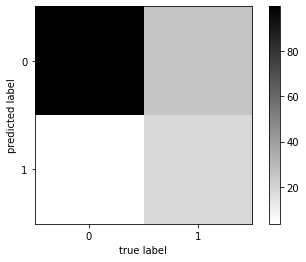

In [120]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

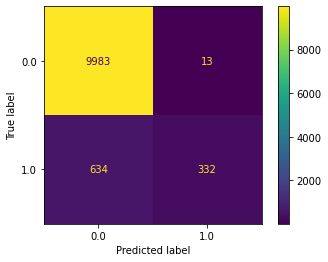

In [121]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp_model, x_test, y_test) 

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      9996
         1.0       0.96      0.34      0.51       966

    accuracy                           0.94     10962
   macro avg       0.95      0.67      0.74     10962
weighted avg       0.94      0.94      0.93     10962



## Балансировка тренировочной выборки


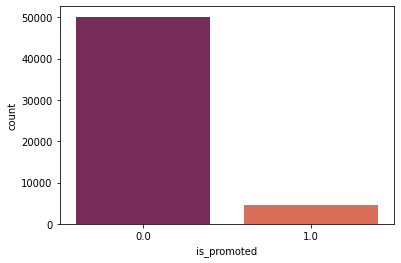

In [25]:
from imblearn.over_sampling import SMOTE
sns.countplot(x = 'is_promoted', data = Y, palette = 'rocket')
pass

In [26]:
x_ext, y_ext = SMOTE().fit_resample(x_train, y_train.values.ravel())
x_ext = pd.DataFrame(x_ext)
y_ext = pd.DataFrame(y_ext)
print("x extended :", x_ext.shape)
print("y extended :",y_ext.shape)

x extended : (80288, 57)
y extended : (80288, 1)


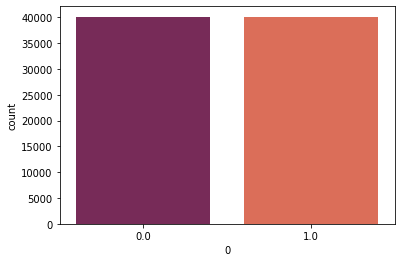

In [27]:
sns.countplot(x = 0, data = y_ext, palette = 'rocket')
pass

In [31]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100, ), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=2000,random_state = 42)
    mlp_model.fit(x_ext, y_ext.values.ravel())

    y_train_pred = mlp_model.predict(x_ext)
    y_test_pred = mlp_model.predict(x_test)
    
    train_err.append(1 - mlp_model.score(x_ext, y_ext))
    test_err.append(1 - mlp_model.score(x_test, y_test))
    train_acc.append(accuracy_score(y_ext, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

E:\Anaonda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\Anaonda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\Anaonda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

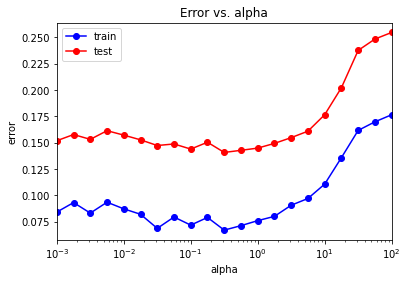

In [32]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

#### Рассмотрим как у нас менялась метрика в зависимости от гиперпараметра:

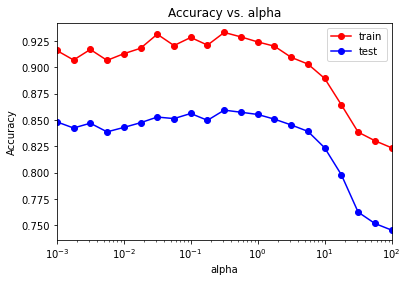

In [33]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

#### Минимальное значение ошибки:

In [34]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0669589477879633 0.14066776135741654


#### Оптимальное значение alpha:

In [35]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.31622777]


#### Классификатор при найденном оптимальном значении alpha:

In [36]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100, ),
                          solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
mlp_model.fit(x_ext, y_ext.values.ravel())

y_train_pred = mlp_model.predict(x_ext)
y_test_pred = mlp_model.predict(x_test)

print(1 - mlp_model.score(x_ext, y_ext))
print(1 - mlp_model.score(x_test, y_test))

E:\Anaonda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.08204214826624157
0.15225323846013505


In [37]:

print(accuracy_score(y_ext, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9179578517337584
0.847746761539865


#### Матрица рассогласования:

In [38]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[8676  349]
 [1320  617]]


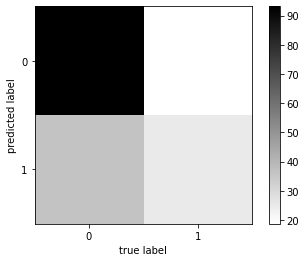

In [39]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

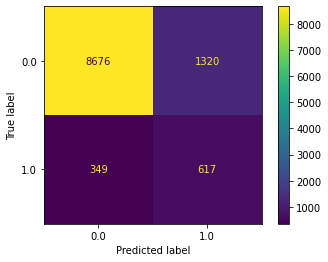

In [40]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp_model, x_test, y_test) 

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test.values.ravel(), y_test_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91      9996
         1.0       0.32      0.64      0.43       966

    accuracy                           0.85     10962
   macro avg       0.64      0.75      0.67     10962
weighted avg       0.90      0.85      0.87     10962



# Вывод
1000 или 2000 итераций в общем случае недостаточно для окончательного обучения, о чем свидетельствует предупреждение о выходе по количеству итераций. Возможно что это просто недостижимо, так как в задаче c k-ближайшими соседями было установлено что есть сотрудники с одинаковыми или очень схожими показателями, но принадлижащих разным классам (повыше и нет). Из-за этого невозможно добиться 0 ошибки при тренировке.

На данной кногокритериальной задаче нейронная сеть показывает результаты, которые можно сравнить с результатами у k-ближайших соседей. В том и в другом случае хорошие показатели обусловлены в основном отказом большей части людей в повышении. При попытке выравнять классы при обучении приводит к росту ошибки на тестовой выборке, так как меняется исходное распределение классов.

Считаю, что лучшее обученик было проведено с alpha = 1 и получить accuracy на тестовой выборке равной 0.941, что лучше чем в случае k-ближайших соседей с приблезительно 0.91

При варировании числа нейронов (50 и 100) в слое и число внутренних слоёв (1, 2, 3) наилучшие результаты не меняются и accuracy примерно равны 0.94